In [1]:
from CONWAY_table_data import evo_table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
evo_mapping_dict = {row[1]: row[2].split() for row in evo_table}
column_names = ['atomic_num', 'element', 'evolution', 'string', 'string_evolution']
df = pd.DataFrame(evo_table, columns=column_names)

In [3]:
evo_mapping_dict['He']

['Hf', 'Pa', 'H', 'Ca', 'Li']

In [4]:
df.head()

,atomic_num,element,evolution,string,string_evolution
0,1,H,H,22,22
1,2,He,Hf Pa H Ca Li,13112221133211322112211213322112,11132132212312211322212221121123222112
2,3,Li,He,312211322212221121123222112,13112221133211322112211213322112
3,4,Be,Ge Ca Li,111312211312113221133211322112211213322112,3113112221131112211322212312211322212221121123...
4,5,B,Be,1321132122211322212221121123222112,111312211312113221133211322112211213322112


In [5]:
def get_encoding(e):
    #print(e)
    one_hot = np.zeros((92))
    elements = evo_mapping_dict[e]
    #print(elements)
    indices = (df.loc[df['element'].isin(elements), 'atomic_num']-1).tolist()
    one_hot[indices] = 1
    return one_hot

In [6]:
def get_atom_label(i):
    return df.loc[df['atomic_num'] == i+1, 'element'].tolist()[0]

In [7]:
onehot = []
for e in df['element']:
    onehot.append(get_encoding(e))
onehot = np.array(onehot)
print(onehot.shape)

(92, 92)


In [8]:
# Create a DataFrame with the connection data
connections_df = pd.DataFrame(onehot, columns=range(1, 93), index=range(1, 93))
connections_df.head()

,1,2,3,4,5,6,7,8,9,10,...,83,84,85,86,87,88,89,90,91,92
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
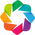

In [9]:
import holoviews as hv
from holoviews import opts
from bokeh.palettes import Blues, Viridis

hv.extension('bokeh')

In [10]:
# Compute the number of connections for each element
num_connections = connections_df.sum(axis=1)

# Create the source data for the chord diagram
data = connections_df.stack().reset_index()
data.columns = ['source', 'target', 'value']
color = [str(num_connections[i]) for i in data['source']]
data['color'] = color

# Create a dictionary to map the atomic numbers to element names
atomic_number_to_element = {row[0]: row[1] for row in evo_table}

# Map the atomic numbers to element names in the data DataFrame
data['source_element'] = data['source'].map(atomic_number_to_element)
data['target_element'] = data['target'].map(atomic_number_to_element)

data = data[data['value'] != 0]
data = data.sort_values(by=['color'], ascending=False)
print(data.head())

plot_data = data[['source_element', 'target_element']]


      source  target  value color source_element target_element
1866      21      27    1.0   5.0             Sc             Co
1840      21       1    1.0   5.0             Sc              H
1906      21      67    1.0   5.0             Sc             Ho
1930      21      91    1.0   5.0             Sc             Pa
92         2       1    1.0   5.0             He              H


In [11]:
labels = list(set(data['source_element'].unique().tolist() + data['target_element'].unique().tolist()))
labels = hv.Dataset(pd.DataFrame(labels, columns=['element']))

In [21]:
%%opts Chord [height=1000 width=1000  labels="element"]
%%opts Chord (node_color="element" node_cmap="Category20" edge_color="source_element" edge_cmap="Category20")
chord = hv.Chord((plot_data, labels))
chord

:Chord   [source_element,target_element]

In [43]:
%%opts Chord [height=1000 width=1000  labels="element"]
%%opts Chord (node_color="element" node_cmap="Paired" edge_color="source_element" edge_cmap="Paired" node_marker="square" node_size=10)
chord2 = hv.Chord((plot_data, labels)).select(value=(10, None))
chord2

:Chord   [source_element,target_element]

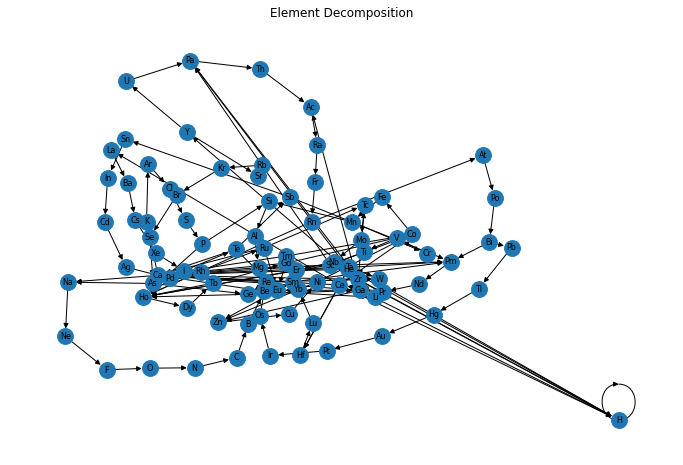

In [21]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Example one-hot-encoded matrix representing decompositions
decomposition_matrix = onehot

# Create a directed graph
graph = nx.DiGraph()

# Add nodes to the graph
for i in range(len(onehot)):
    graph.add_node(i + 1, label=get_atom_label(i))  # Nodes are labeled from 1 to 93

# Add edges to the graph based on the decomposition matrix
for i in range(len(onehot)):
    for j in range(len(onehot)):
        if decomposition_matrix[i, j] == 1:
            graph.add_edge(i + 1, j + 1)  # Edges represent the decomposition relationship

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph)  # Position the nodes using a fruchterman_reingold layout
nx.draw_networkx(graph, pos, with_labels=True, node_size=250,
                 font_size=8, labels=nx.get_node_attributes(graph, 'label'))
plt.title("Element Decomposition")
plt.axis("off")
plt.show()
